In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer 
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

In [3]:
# Read the data
X_full= pd.read_csv('D:/PERSONAL DATA/Studies/Excel/Kaggle/home-data-for-ml-course/train.csv', index_col='Id')
X_test_full = pd.read_csv('D:/PERSONAL DATA/Studies/Excel/Kaggle/home-data-for-ml-course/test.csv', index_col='Id')

In [4]:
import sweetviz as sv

In [5]:
#analyzing the dataset
advert_report = sv.analyze(X_full)
#display the report
advert_report.show_html('Advertising.html')

:FEATURES DONE:                    |                     | [  0%]   00:35  -> (00:00 left)
:PAIRWISE DONE:                    |█████████████████████| [100%]   00:10  -> (00:00 left)


Creating Associations graph... DONE!


In [6]:
pd.options.display.max_columns = 100
pd.options.display.max_rows = 100

In [7]:
X_full.shape

(1460, 80)

In [8]:
# remove the rows with missing target (SalePrice)
X_full.dropna(axis=0, subset=['SalePrice'], inplace=True)

#separate target from predictors
# y = np.log(X_full.SalePrice)
y = X_full.SalePrice
X_full.drop(['SalePrice'], axis=1, inplace=True)

# take some validation set from training data - eg. 80 - 20 % split
X_train_full, X_valid_full, y_train, y_valid = train_test_split(X_full, y, 
                                                                train_size=0.8, test_size=0.2,
                                                                random_state=0)

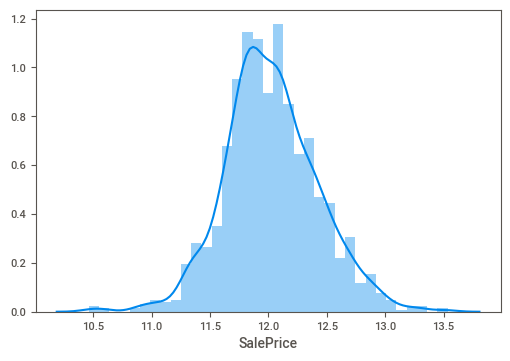

In [9]:
sns.distplot((np.log(y)))

In [10]:
# Select categorical columns with relatively low cardinality 
categorical_cols = [cname for cname in X_train_full.columns if
                    X_train_full[cname].nunique() < 50 and 
                    X_train_full[cname].dtype == "object"]

# Select numerical columns
numerical_cols = [cname for cname in X_train_full.columns if 
                X_train_full[cname].dtype in ['int64', 'float64']]

# Keep selected columns only - numerical and low cardinality categorical columns
my_cols = categorical_cols + numerical_cols
X_train = X_train_full[my_cols].copy()
X_valid = X_valid_full[my_cols].copy()
X_test = X_test_full[my_cols].copy()

In [12]:
my_report = sv.compare([X_train, "Training Data"], [X_valid, "Test Data"], "SalePrice", feature_config)


NameError: name 'feature_config' is not defined

In [15]:
X_train_full.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [16]:
X_train_full['BsmtFinType']

KeyError: 'BsmtFinType'

In [ ]:
categorical_cols = ['OverallQual',
'Neighborhood',
'GarageCars',
'ExterQual',
'BsmtQual',
'KitchenQual',
'FullBath',
'GarageFinish',
'FireplaceQu',
'Foundation',
'GarageType',
'Fireplaces',
'BsmtFinType1',
'HeatingQC']
numerical_cols = ['GrLivArea',
'GarageArea',
'TotalBsmtSF',
'1stFlrSF',
'TotRmsAbvGrd',
'YearBuilt',
'YearRemodAdd',
'GarageYrBlt',
'MasVnrArea',
'BsmtFinSF1',
'LotFrontage',
'WoodDeckSF',
'2ndFlrSF',
'OpenPorchSF']

# Keep selected columns only - numerical and low cardinality categorical columns
my_cols = categorical_cols + numerical_cols
X_train = X_train_full[my_cols].copy()
X_valid = X_valid_full[my_cols].copy()
X_test = X_test_full[my_cols].copy()

In [17]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_absolute_error

# Preprocessing for numerical data - a simple imputation strategy
numerical_transformer = SimpleImputer(strategy='mean')

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# combine the preprocessing of numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

In [18]:
## define a gradient boosting model
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error
# note that you can fine tune the parameters of xgb using grid search or other equivalent approaches
model_xgb = XGBRegressor(n_estimators=2000, learning_rate=0.03, n_jobs=4, random_state=0,  early_stopping_rounds=10, subsample = 0.5, reg_lambda = 0.5,
                       feature_selector = 'shuffle', tree_method = 'exact',
             eval_set=[(X_valid, y_valid)], 
             verbose=False)

In [19]:
from sklearn.linear_model import Lasso
reg = Lasso()

In [20]:
## lets do the training / fitting of the model here
# lets create a pipeline for combining the preprocessing and modeling
my_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', model_xgb)
                             ])

# Preprocessing of training data, fit model 
my_pipeline.fit(X_train, y_train) 


# Preprocessing of validation data, get predictions
preds = my_pipeline.predict(X_valid)

# Evaluate the model
score = mean_absolute_error(y_valid, preds)
print('MAE:', score)

[17:04:23] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { early_stopping_rounds, eval_set, feature_selector, verbose } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


MAE: 15170.56027932363


In [23]:
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import mean_squared_error

In [24]:
s=np.sqrt(mean_squared_error(y_valid, preds))
print('MSE:', s)

MSE: 28050.196778927784


In [25]:
from sklearn.metrics import r2_score


In [26]:
r2_score(y_valid, preds)

0.8860656481913448

In [30]:
np.exp(score)


FloatingPointError: overflow encountered in exp

In [31]:
## generating test predictions
preds_test = my_pipeline.predict(X_test)

In [32]:
# Save the test predictions 
output = pd.DataFrame({'Id': X_test.index,
                       'SalePrice': np.exp(preds_test)})
output.to_csv('submission.csv', index=False)

## submit your predictions - at the time of writing, it was in the top 4% of the leaderboard
# thanks to the mini course on ML: https://www.kaggle.com/learn/intermediate-machine-learning 

FloatingPointError: overflow encountered in exp

In [ ]:
ssss = pd.read_csv('submission.csv')
ssss